In [139]:

#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt
from matplotlib.pyplot import figure
import numpy as np

In [163]:
abnb_5 = pd.read_csv('...abnb_5_afterexploratory.csv')

Some more adjustments for missing values

In [164]:

#1. host_is_superhost (missingness is 3.6%). 
def missingness(feature):
    return (feature.isnull().sum()/feature.count())*100


In [165]:
print(missingness(abnb_5['host_is_superhost']))
print(missingness(abnb_5['bathrooms_number']))
print(missingness(abnb_5['beds']))
print(missingness(abnb_5['review_scores_rating']))

3.5747696669029057
0.31024352744145184
1.590479368257146
38.81986397659485


In [166]:
#for superhost feature, can impute 0s for NaN (because in most cases, missing implies they are not superhosts)
abnb_5['host_is_superhost'] = abnb_5['host_is_superhost'].fillna(0)

In [167]:
abnb_5['host_is_superhost'] = abnb_5['host_is_superhost'].astype(int)

In [168]:
print(abnb_5['bathrooms_number'].describe())
print(abnb_5['beds'].describe())

count    36423.000000
mean         1.152019
std          0.437700
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: bathrooms_number, dtype: float64
count    35964.000000
mean         1.521132
std          1.089174
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         24.000000
Name: beds, dtype: float64


In [169]:
# for bathrooms NaNs imputed with 1 as it's the median value
abnb_5['bathrooms_number'] = abnb_5['bathrooms_number'].fillna(abnb_5['bathrooms_number'].median())


In [170]:
abnb_5['beds'] = abnb_5['beds'].fillna(abnb_5['beds'].median())

In [171]:
# Since review_scores_rating has around 38% missingness, it's better not to impute missingvalues and therefore cannot be used 
# in modeling.

35 datapoints in target feature has 0s, this needs to be removed. Then it 
needs to be log transformed as discussed in Exploratory analysis.


In [172]:
abnb_5['price'].loc[abnb_5['price'] == 0].count()

35

In [173]:
abnb_5 = abnb_5.loc[abnb_5['price'] != 0]

In [174]:
abnb_5['price'].describe()

count    36501.000000
mean       130.205748
std        110.195914
min         10.000000
25%         60.000000
50%        100.000000
75%        156.000000
max        946.000000
Name: price, dtype: float64

In [175]:
from sklearn.preprocessing import PowerTransformer
log = PowerTransformer()
abnb_5['log_price'] = log.fit_transform(abnb_5[['price']])


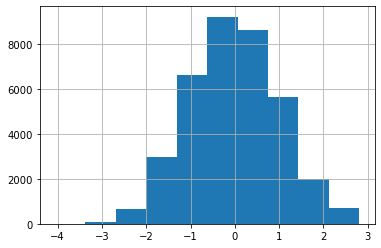

In [176]:
# After transformation histogram looks more normally distributed
abnb_5['log_price'].hist()
plt.show()

In [177]:
pd.set_option('display.max_columns', None)

In [178]:
abnb_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36501 entries, 0 to 36535
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         36501 non-null  int64  
 1   central_park_lati                  36501 non-null  float64
 2   central_park_longi                 36501 non-null  float64
 3   Unnamed: 0.1                       36501 non-null  int64  
 4   Listing #                          36501 non-null  int64  
 5   name                               36488 non-null  object 
 6   host_id                            36501 non-null  int64  
 7   host_name                          35242 non-null  object 
 8   host_since                         35242 non-null  object 
 9   host_about                         21022 non-null  object 
 10  host_response_time                 18427 non-null  object 
 11  host_response_rate                 18427 non-null  flo

In [179]:
# Subsetting features for further analysis.
# from neighborhood and room type dummy variables, dropping one category
abnb_6 = abnb_5[['Listing #', 'host_is_superhost', 'accommodates', 'bedrooms', 'bathrooms_number', 'beds', 'num_amenities',
                 'number_of_reviews', 'instant_bookable', 'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 
                 'neighbourhood_group_Queens', 'room_type_Entire home/apt', 'room_type_Hotel room', 'room_type_Private room','income', 'log_price' ]]

In [180]:
abnb_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36501 entries, 0 to 36535
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Listing #                      36501 non-null  int64  
 1   host_is_superhost              36501 non-null  int32  
 2   accommodates                   36501 non-null  int64  
 3   bedrooms                       36501 non-null  float64
 4   bathrooms_number               36501 non-null  float64
 5   beds                           36501 non-null  float64
 6   num_amenities                  36501 non-null  int64  
 7   number_of_reviews              36501 non-null  int64  
 8   instant_bookable               36501 non-null  int64  
 9   neighbourhood_group_Bronx      36501 non-null  int64  
 10  neighbourhood_group_Brooklyn   36501 non-null  int64  
 11  neighbourhood_group_Manhattan  36501 non-null  int64  
 12  neighbourhood_group_Queens     36501 non-null 

In [181]:
X = abnb_6.drop(columns = ['log_price', 'Listing #'], axis=1)
y = abnb_6['log_price']

In [182]:
# splitting data for train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=19)

In [183]:
X_train.head()

,host_is_superhost,accommodates,bedrooms,bathrooms_number,beds,num_amenities,number_of_reviews,instant_bookable,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,income
1367,0,2,1.0,1.0,1.0,17,1,0,0,1,0,0,1,0,0,31406
30778,0,3,2.0,2.0,1.0,15,0,1,0,0,1,0,1,0,0,50985
31920,0,3,1.0,1.0,1.0,27,0,1,0,0,1,0,1,0,0,50985
27541,0,3,1.0,1.0,1.0,34,1,1,1,0,0,0,1,0,0,22232
12073,0,2,1.0,1.0,1.0,20,19,0,0,1,0,0,0,0,1,31406


In [184]:
# Standardising numeric feautures

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train.iloc[:, 1:7] = scaler.fit_transform(X_train.iloc[:, 1:7])
X_test.iloc[:, 1:7] = scaler.transform(X_test.iloc[:, 1:7])

C:\Users\tnsub\ANACONDA\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\tnsub\ANACONDA\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [185]:
X_test.head()

,host_is_superhost,accommodates,bedrooms,bathrooms_number,beds,num_amenities,number_of_reviews,instant_bookable,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,income
11191,1,-0.425540,-0.232745,-0.348645,-0.474956,0.014963,1.213281,1,0,0,0,1,0,0,1,31992
12643,1,0.691296,1.090220,-0.348645,1.371645,0.950609,1.588203,0,0,0,1,0,1,0,0,50985
12877,0,-0.425540,-1.555711,-0.348645,-0.474956,0.430806,0.442610,0,0,0,1,0,1,0,0,50985
13245,0,-0.425540,-0.232745,1.928109,-0.474956,-1.024644,-0.473865,1,0,1,0,0,0,0,1,31406
30516,0,-0.983958,-0.232745,-0.348645,-0.474956,-0.192959,-0.473865,0,0,0,1,0,1,0,0,50985


In [186]:
X_train.head()

,host_is_superhost,accommodates,bedrooms,bathrooms_number,beds,num_amenities,number_of_reviews,instant_bookable,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,income
1367,0,-0.425540,-0.232745,-0.348645,-0.474956,-0.400880,-0.453036,0,0,1,0,0,1,0,0,31406
30778,0,0.132878,1.090220,1.928109,-0.474956,-0.608801,-0.473865,1,0,0,1,0,1,0,0,50985
31920,0,0.132878,-0.232745,-0.348645,-0.474956,0.638727,-0.473865,1,0,0,1,0,1,0,0,50985
27541,0,0.132878,-0.232745,-0.348645,-0.474956,1.366452,-0.453036,1,1,0,0,0,1,0,0,22232
12073,0,-0.425540,-0.232745,-0.348645,-0.474956,-0.088998,-0.078115,0,0,1,0,0,0,0,1,31406
